In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

text account_type
0  we have sitting democrat us senator on trial f...        Right
1  marshawn lynch arrives to game in anti trump s...        Right
2  daughter of fallen navy sailor delivers powerf...        Right
3  just in president trump dedicates presidents c...        Right
4   respecting our national anthem standforouranthem        Right

In [3]:
my_df.info

<bound method DataFrame.info of                                                      text account_type
0       we have sitting democrat us senator on trial f...        Right
1       marshawn lynch arrives to game in anti trump s...        Right
2       daughter of fallen navy sailor delivers powerf...        Right
3       just in president trump dedicates presidents c...        Right
4        respecting our national anthem standforouranthem        Right
...                                                   ...          ...
239995    gov deal to speak about reconstruction progress        local
239996  police man arrested after dragging clayton co ...        local
239997  kids to alpharetta firefighters did not know o...        local
239998    best places to take wedding pictures in atlanta        local
239999  police looking for person of interest in walma...        local

[240000 rows x 2 columns]>

#### Delete null values

In [4]:
my_df[my_df.isnull().any(axis=1)].head()

text account_type
6    NaN        Right
135  NaN        Right
146  NaN        Right
149  NaN        Right
163  NaN        Right

In [5]:
np.sum(my_df.isnull().any(axis=1))

37685

In [6]:
my_df.isnull().any(axis=0)

text             True
account_type    False
dtype: bool

In [7]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202315 entries, 0 to 202314
Data columns (total 2 columns):
text            202315 non-null object
account_type    202315 non-null object
dtypes: object(2)
memory usage: 3.1+ MB


In [8]:
np.sum(my_df.isnull().any(axis=1))

0

#### Left Wordcloud

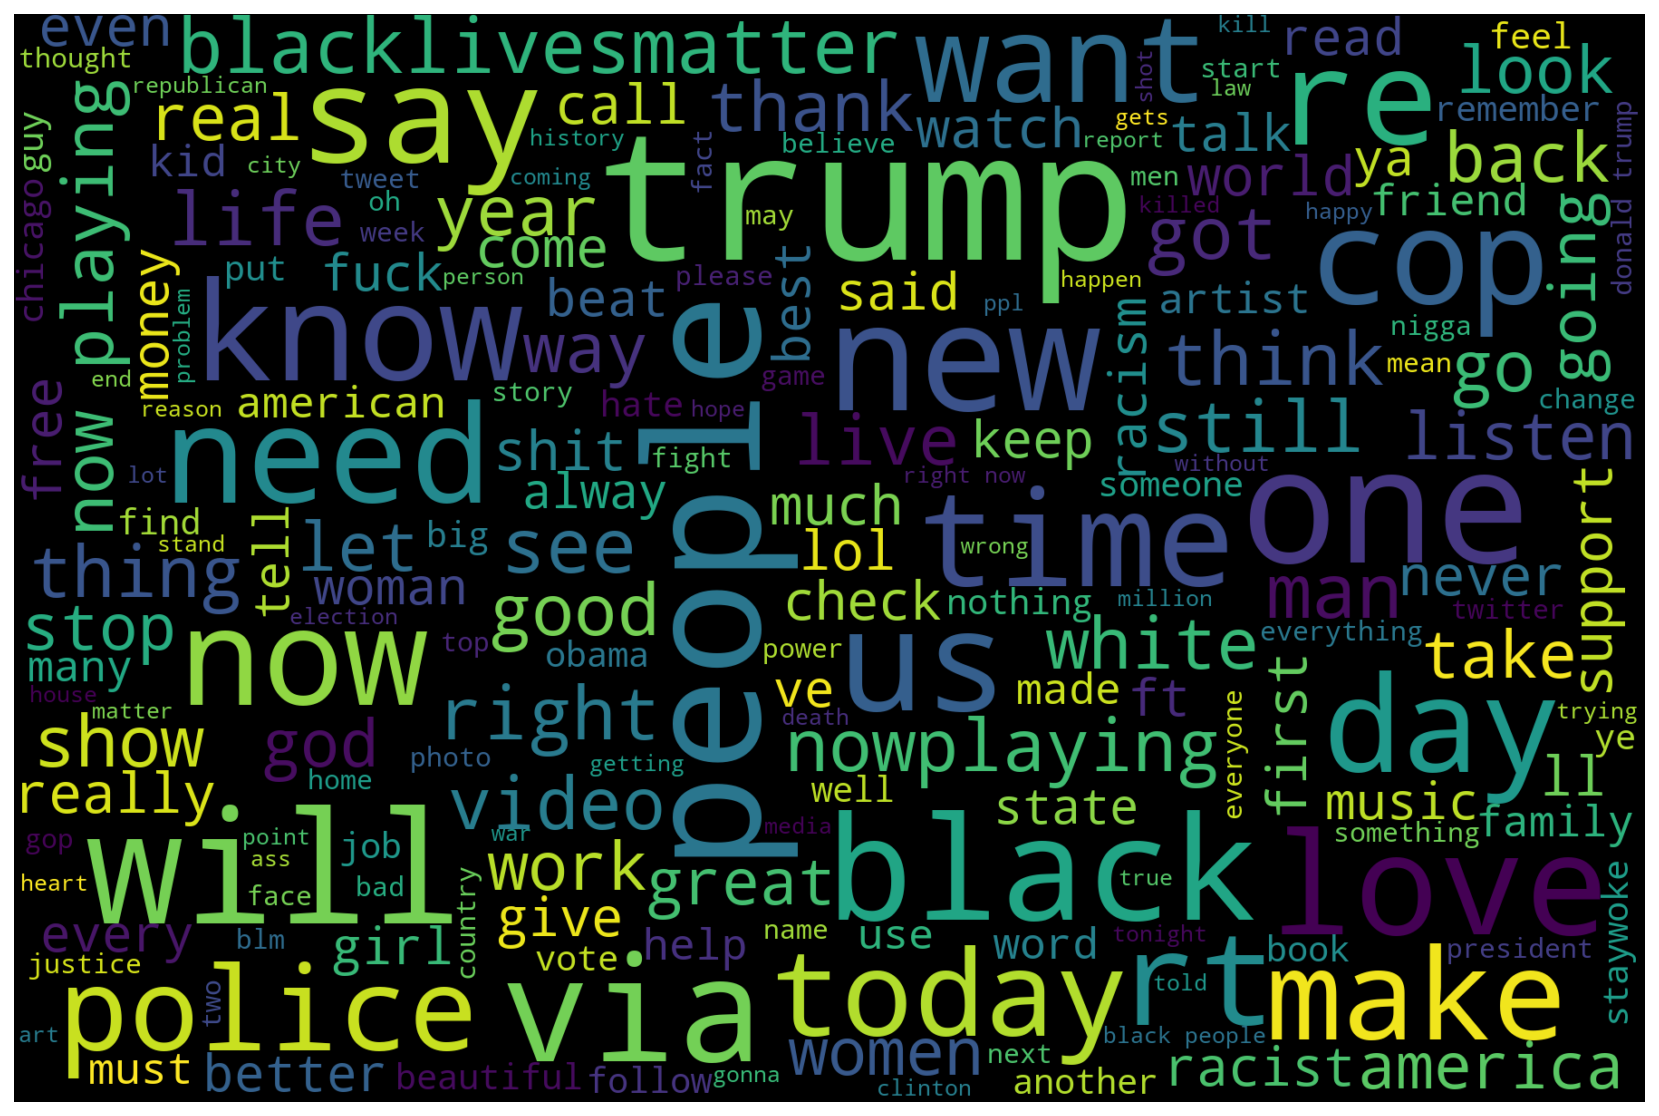

In [29]:
left_tweets = my_df[my_df.account_type == "Left"]
left_string = []
for t in left_tweets.text:
    left_string.append(t)
left_string = pd.Series(left_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1800, height=1200,max_font_size=200, max_words=200).generate(left_string)
plt.figure(figsize=(24,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
print(left_string)

blacklivesmatter blm equality equalrights so if you pay more taxes you have more rights this how it works some of you black students force the university to divest million in private prisons blacktwitter racist maine gov on drug problem racistscum idiot can breathe video of police dragging barbara dawson from the hospital blm cop sentenced to five years for pointing gun in man face case re opened cop shoot man times as he was face down in handcuffs policebrutality at last nypd cop in eric garner death faces departmental charges blacklivesmatter policestate policebrutality that feel when you find this new great song and listen to it on repeat what the ck policebrutality policestate same old story rich and white your alright end of story equality equalrights obama delivers his final state of the union address but said nothing about blm why did they count slavery as incarceration policestate policebrutality incarceration on this day in johnson appoints first african american cabinet membe

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(left_string)
print(tokenized_word)

In [ ]:
right_tweets = my_df[my_df.account_type == "Right"]
right_string = []
for t in right_tweets.text:
    right_string.append(t)
right_string = pd.Series(right_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(right_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Russian

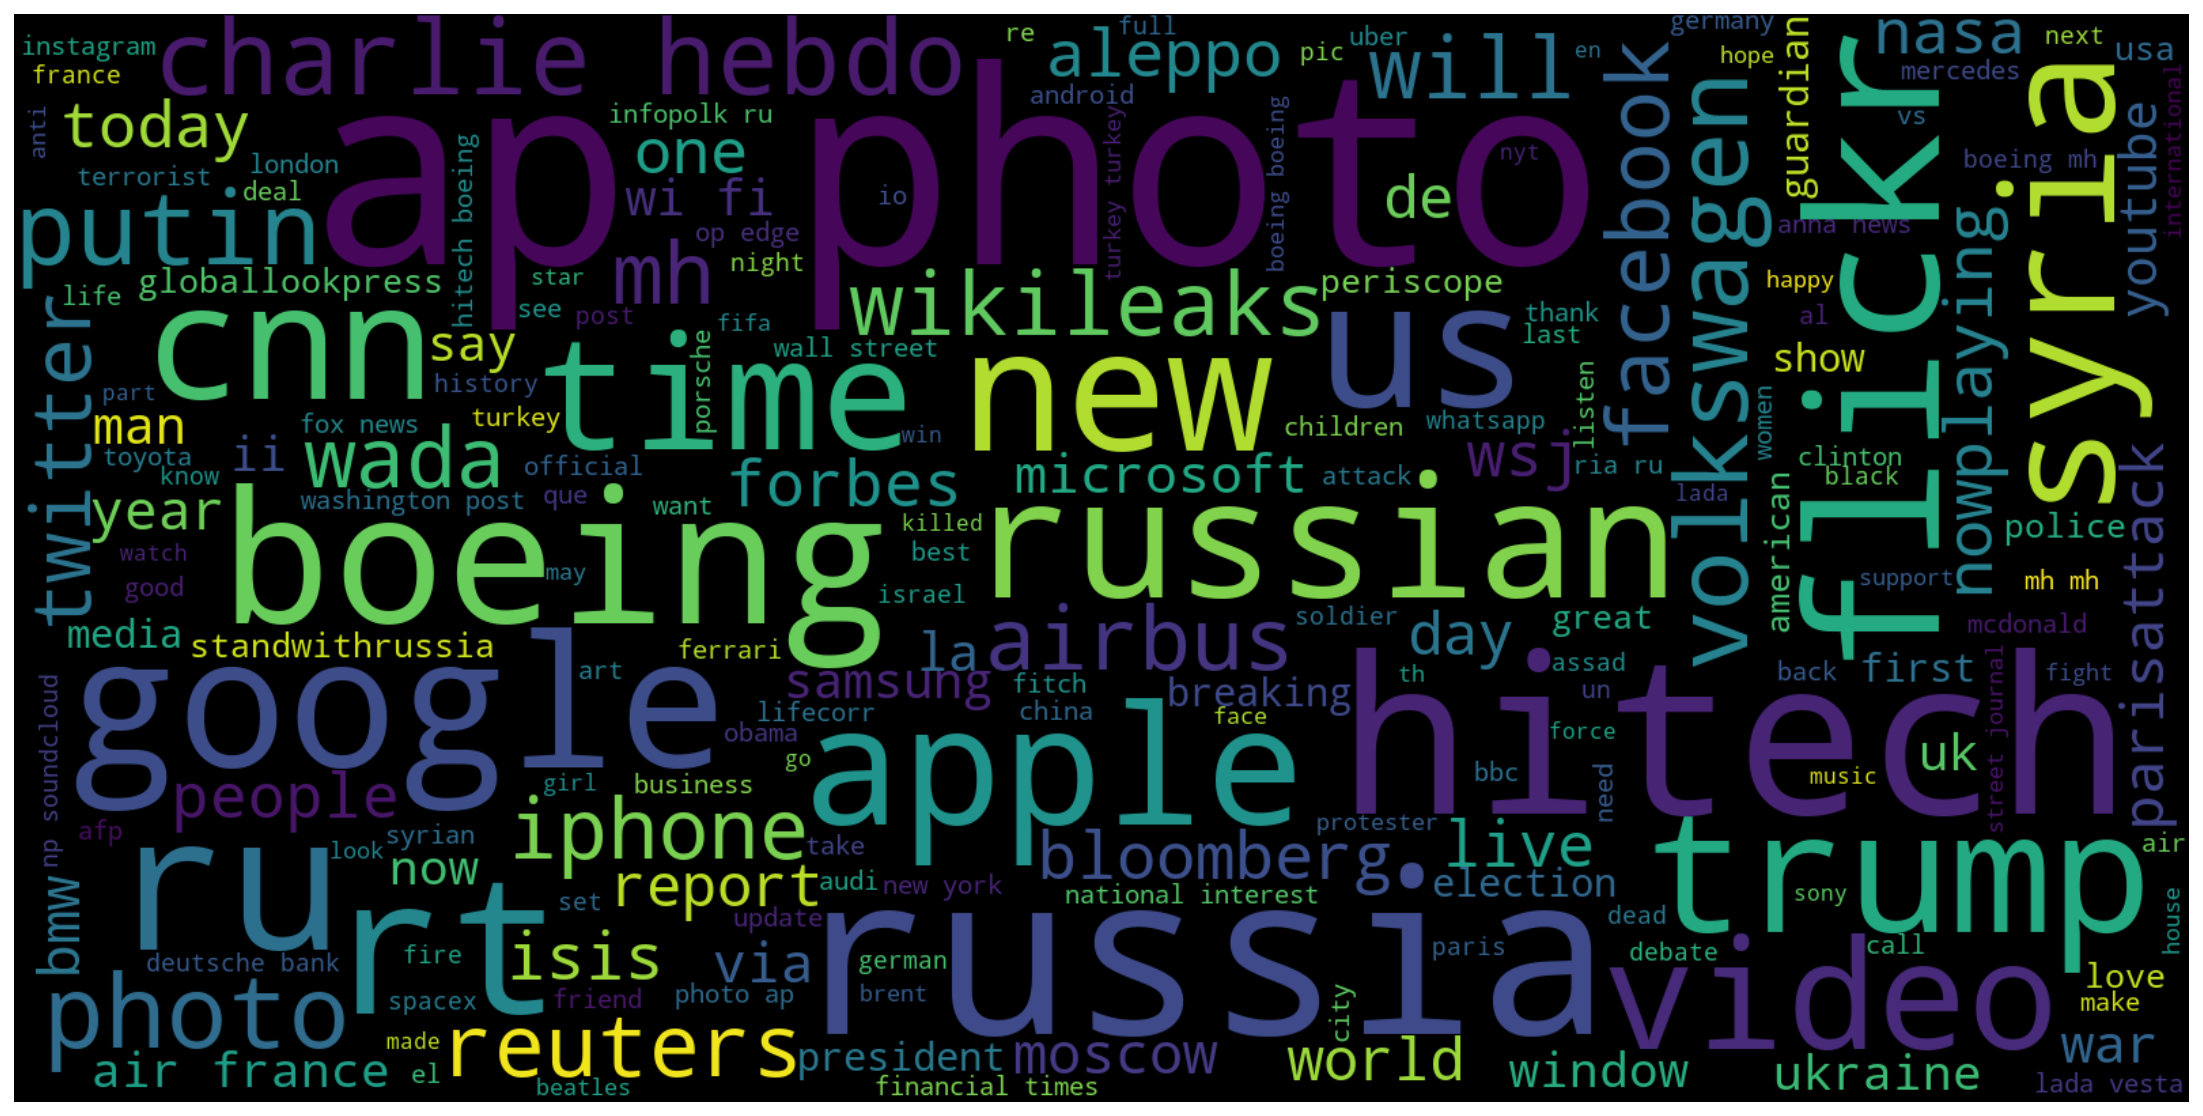

In [27]:
rus_tweets = my_df[my_df.account_type == "Russian"]
rus_string = []
for t in rus_tweets.text:
    rus_string.append(t)
rus_string = pd.Series(rus_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(rus_string)
plt.figure(figsize=(24,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Tokenize

In [30]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(rus_string)
print(tokenized_word)

['reuters', 'porsche', 'panamera', 'lada', 'mail', 'ru', 'google', 'chrome', 'aliexpress', 'youtube', 'ufc', 'fox', 'news', 'nyt', 'who', 'the', 'fuck', 'is', 'pychkov', 'russia', 'today', 'careless', 'dangerous', 'driving', 'tesla', 'starter', 'pack', 'cnn', 'ferrari', 'do', 'not', 'worry', 'be', 'happy', 'fox', 'news', 'deus', 'vult', 'spacex', 'ferrari', 'iphone', 'russia', 'at', 'the', 'un', 'session', 'on', 'syria', 'ulitsa', 'nineteen', 'oh', 'five', 'goda', 'instagram', 'rage', 'pokemongo', 'you', 'are', 'welcome', 'mad', 'magazine', 'elcin', 'palace', 'halle', 'fuckin', 'lujah', 'hyperloop', 'transparency', 'international', 'land', 'cruiser', 'deus', 'vult', 'duty', 'free', 'aliexpress', 'serb', 'collemassari', 'dimon', 'dimon', 'everyday', 'hustlin', 'fox', 'news', 'putin', 'is', 'life', 'putin', 'is', 'love', 'silent', 'hill', 'spacex', 'google', 'telegram', 'telegram', 'spacex', 'mma', 'apple', 'transparency', 'ii', 'petya', 'valley', 'forge', 'millitary', 'college', 'tesla'

In [31]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 8721 samples and 34320 outcomes>


In [32]:
fdist.most_common(20)

[('the', 720),
 ('to', 582),
 ('in', 542),
 ('of', 527),
 ('photo', 316),
 ('ap', 297),
 ('on', 280),
 ('and', 241),
 ('hitech', 233),
 ('for', 224),
 ('russia', 210),
 ('is', 201),
 ('boeing', 195),
 ('apple', 162),
 ('by', 160),
 ('ru', 151),
 ('with', 151),
 ('rt', 140),
 ('you', 139),
 ('mh', 135)]

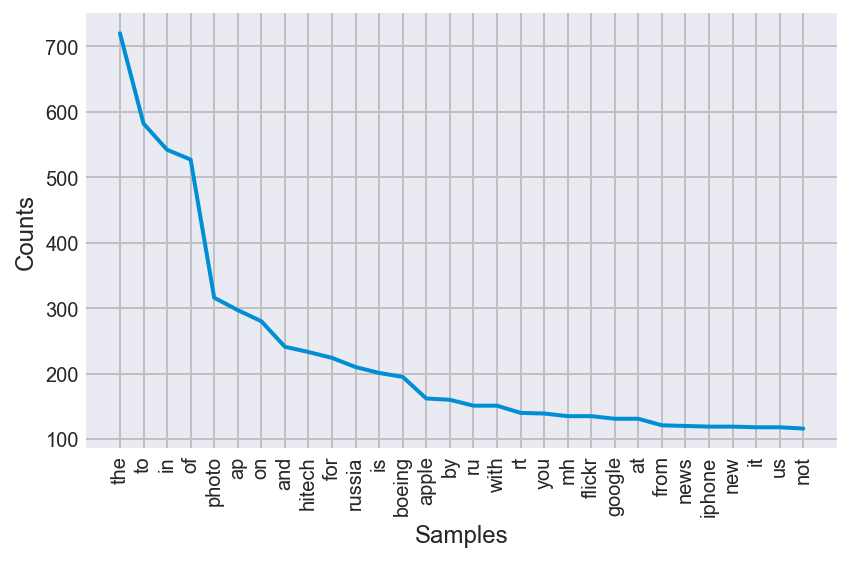

In [33]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

#### Remove Stopwords

In [35]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(stop_words)

{'am', 'herself', 'more', 'on', "shouldn't", 'so', 'needn', 'very', "should've", 'are', 'under', 'only', 'isn', "wouldn't", 'weren', 'll', "you've", 'same', 'this', 'm', 'here', 'his', 'too', 'ain', 'we', 'through', 'mightn', 'our', 'o', 'been', "couldn't", 'to', 'doesn', "needn't", 'shouldn', 'why', 'other', 'he', 'there', 'if', 'with', 'about', 'him', 're', 'yourselves', 'during', 'both', "hasn't", "won't", 'most', 'not', "it's", 'have', 'haven', "weren't", "she's", 'the', 'hasn', 's', 'they', 'i', 'own', 'what', 'just', 'for', 'once', 'an', 'that', 'these', 'd', 'has', 'should', 'above', 'off', 'shan', 'her', 'me', 'she', "didn't", 'until', 'against', 'into', "you'll", 'was', 'theirs', "mustn't", 'in', 'who', 'such', 'between', 'a', 'where', 'and', 't', 'ma', 'each', 'before', 'is', 'by', 'itself', 'whom', 'aren', "doesn't", 'wasn', 'their', 'because', 'no', 'after', 'down', 'nor', 'were', 'your', 'couldn', 'ourselves', 'how', 'as', 'but', 'being', 'at', 'myself', 'up', 'from', 'you

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/computer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
#print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['reuters', 'porsche', 'panamera', 'lada', 'mail', 'ru', 'google', 'chrome', 'aliexpress', 'youtube', 'ufc', 'fox', 'news', 'nyt', 'fuck', 'pychkov', 'russia', 'today', 'careless', 'dangerous', 'driving', 'tesla', 'starter', 'pack', 'cnn', 'ferrari', 'worry', 'happy', 'fox', 'news', 'deus', 'vult', 'spacex', 'ferrari', 'iphone', 'russia', 'un', 'session', 'syria', 'ulitsa', 'nineteen', 'oh', 'five', 'goda', 'instagram', 'rage', 'pokemongo', 'welcome', 'mad', 'magazine', 'elcin', 'palace', 'halle', 'fuckin', 'lujah', 'hyperloop', 'transparency', 'international', 'land', 'cruiser', 'deus', 'vult', 'duty', 'free', 'aliexpress', 'serb', 'collemassari', 'dimon', 'dimon', 'everyday', 'hustlin', 'fox', 'news', 'putin', 'life', 'putin', 'love', 'silent', 'hill', 'spacex', 'google', 'telegram', 'telegram', 'spacex', 'mma', 'apple', 'transparency', 'ii', 'petya', 'valley', 'forge', 'millitary', 'college', 'tesla', 'kia', 'trump', 'imagine', 'ronald', 'reagan', 'idolizing', 'som

In [37]:
from nltk.probability import FreqDist
fdist = FreqDist(filtered_sent)
print(fdist)

<FreqDist with 8594 samples and 27393 outcomes>


In [38]:
fdist.most_common(20)

[('photo', 316),
 ('ap', 297),
 ('hitech', 233),
 ('russia', 210),
 ('boeing', 195),
 ('apple', 162),
 ('ru', 151),
 ('rt', 140),
 ('mh', 135),
 ('flickr', 135),
 ('google', 131),
 ('news', 120),
 ('iphone', 119),
 ('new', 119),
 ('us', 118),
 ('trump', 112),
 ('russian', 103),
 ('reuters', 98),
 ('cnn', 94),
 ('syria', 88)]

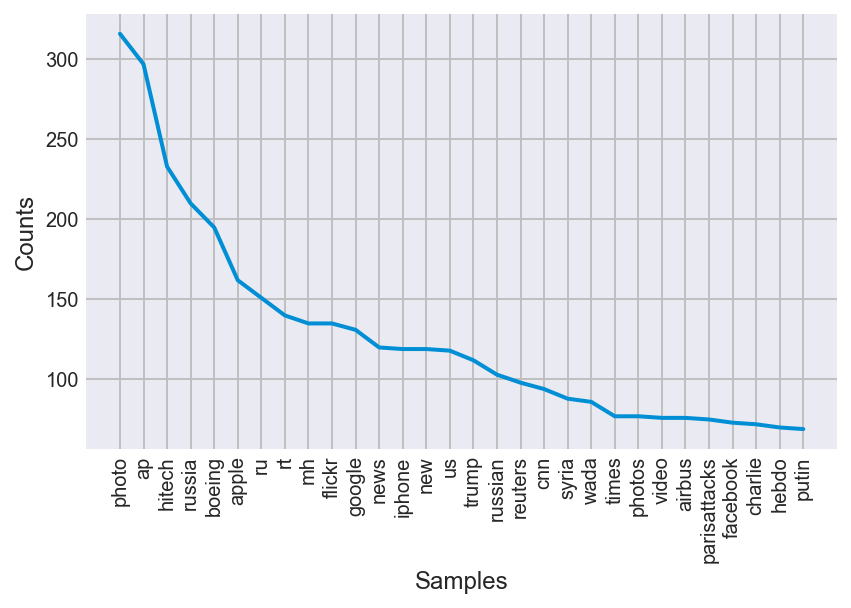

In [39]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

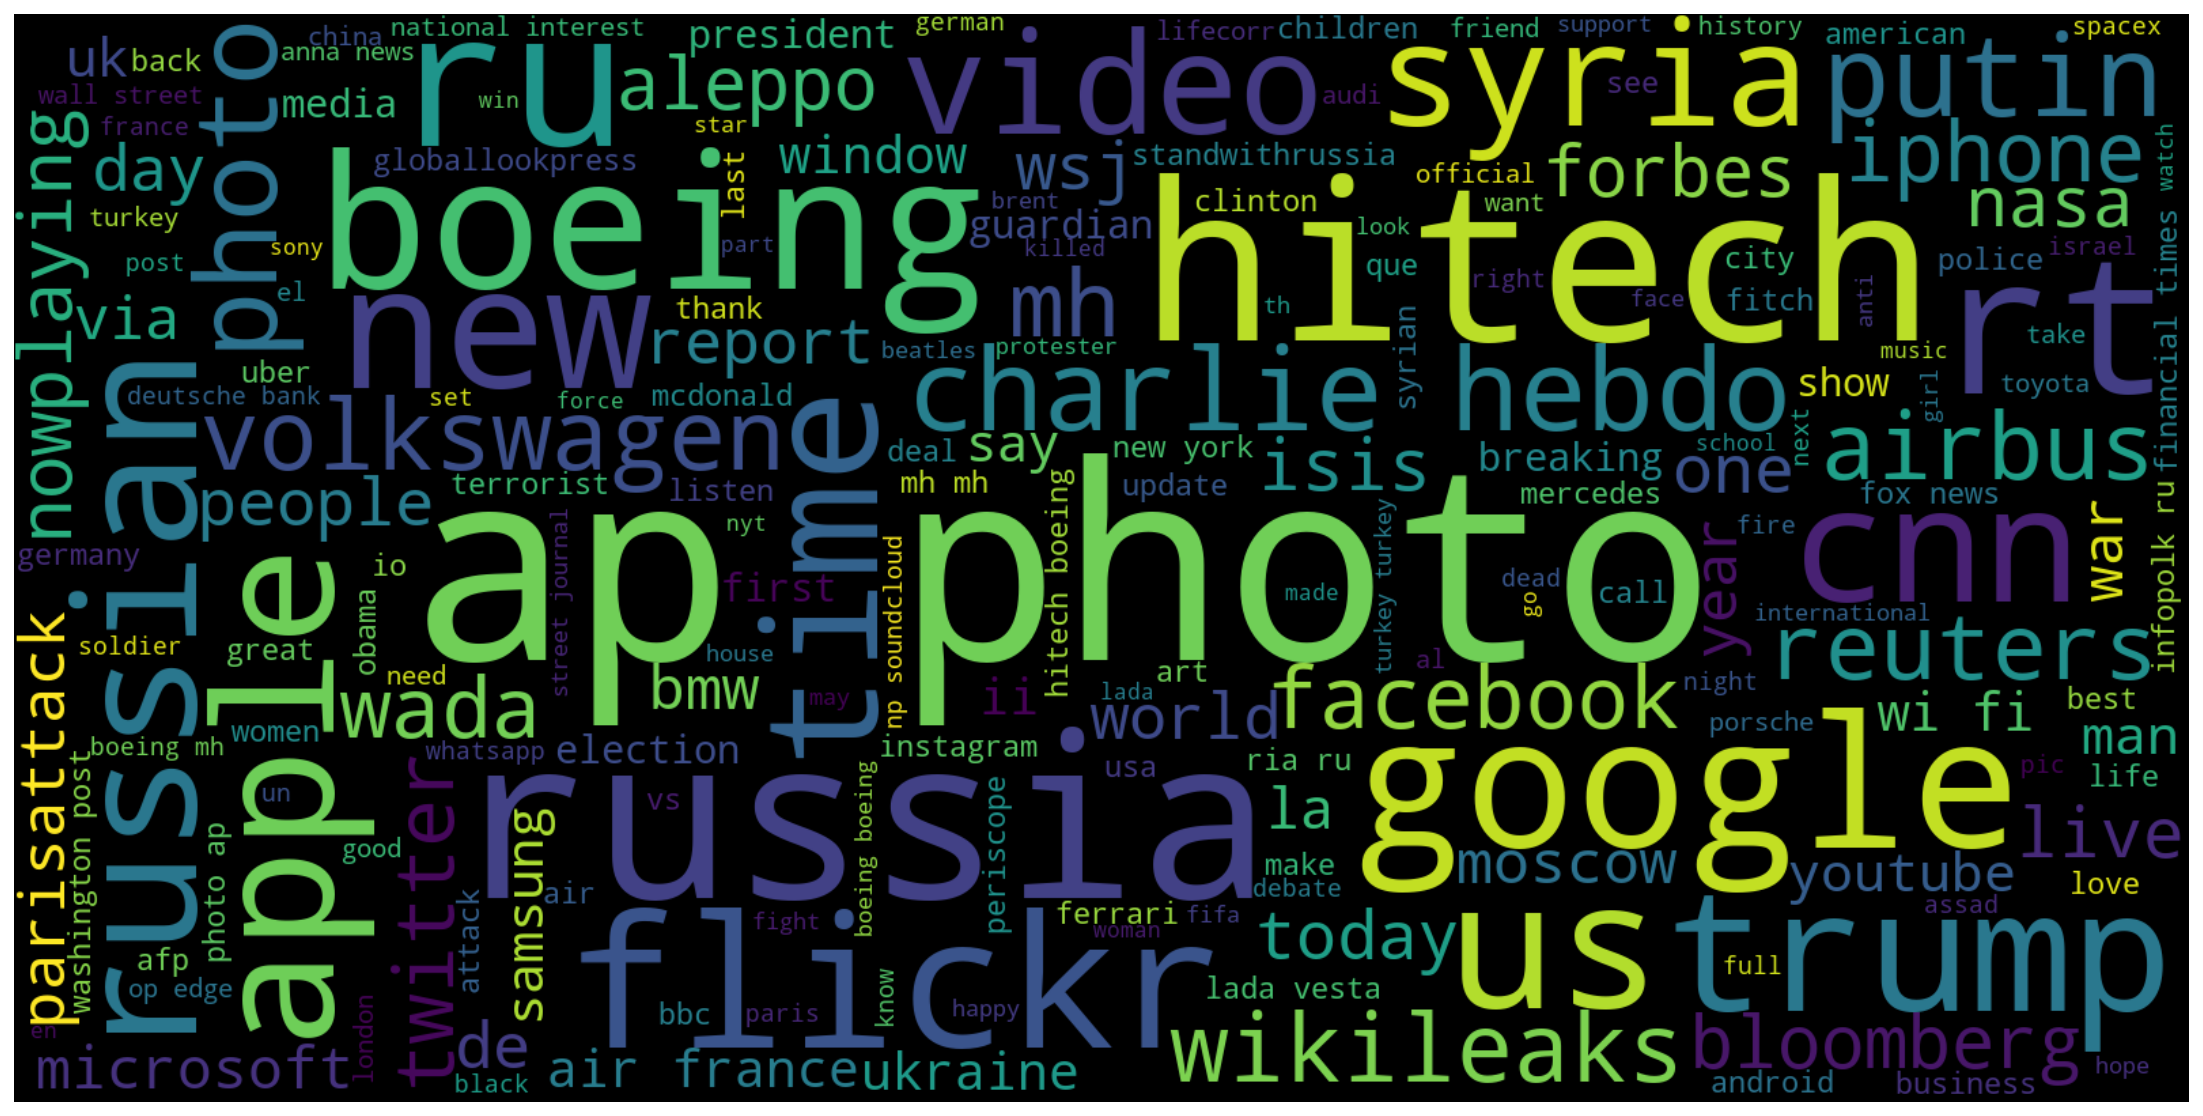

In [47]:
filt_sent = " ".join(filtered_sent)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(filt_sent)
plt.figure(figsize=(24,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Lexicon normalization - Stemming

In [48]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

#print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Stemmed Sentence: ['reuter', 'porsch', 'panamera', 'lada', 'mail', 'ru', 'googl', 'chrome', 'aliexpress', 'youtub', 'ufc', 'fox', 'news', 'nyt', 'fuck', 'pychkov', 'russia', 'today', 'careless', 'danger', 'drive', 'tesla', 'starter', 'pack', 'cnn', 'ferrari', 'worri', 'happi', 'fox', 'news', 'deu', 'vult', 'spacex', 'ferrari', 'iphon', 'russia', 'un', 'session', 'syria', 'ulitsa', 'nineteen', 'oh', 'five', 'goda', 'instagram', 'rage', 'pokemongo', 'welcom', 'mad', 'magazin', 'elcin', 'palac', 'hall', 'fuckin', 'lujah', 'hyperloop', 'transpar', 'intern', 'land', 'cruiser', 'deu', 'vult', 'duti', 'free', 'aliexpress', 'serb', 'collemassari', 'dimon', 'dimon', 'everyday', 'hustlin', 'fox', 'news', 'putin', 'life', 'putin', 'love', 'silent', 'hill', 'spacex', 'googl', 'telegram', 'telegram', 'spacex', 'mma', 'appl', 'transpar', 'ii', 'petya', 'valley', 'forg', 'millitari', 'colleg', 'tesla', 'kia', 'trump', 'imagin', 'ronald', 'reagan', 'idol', 'someon', 'like', 'putin', 'via', 'porsch', '

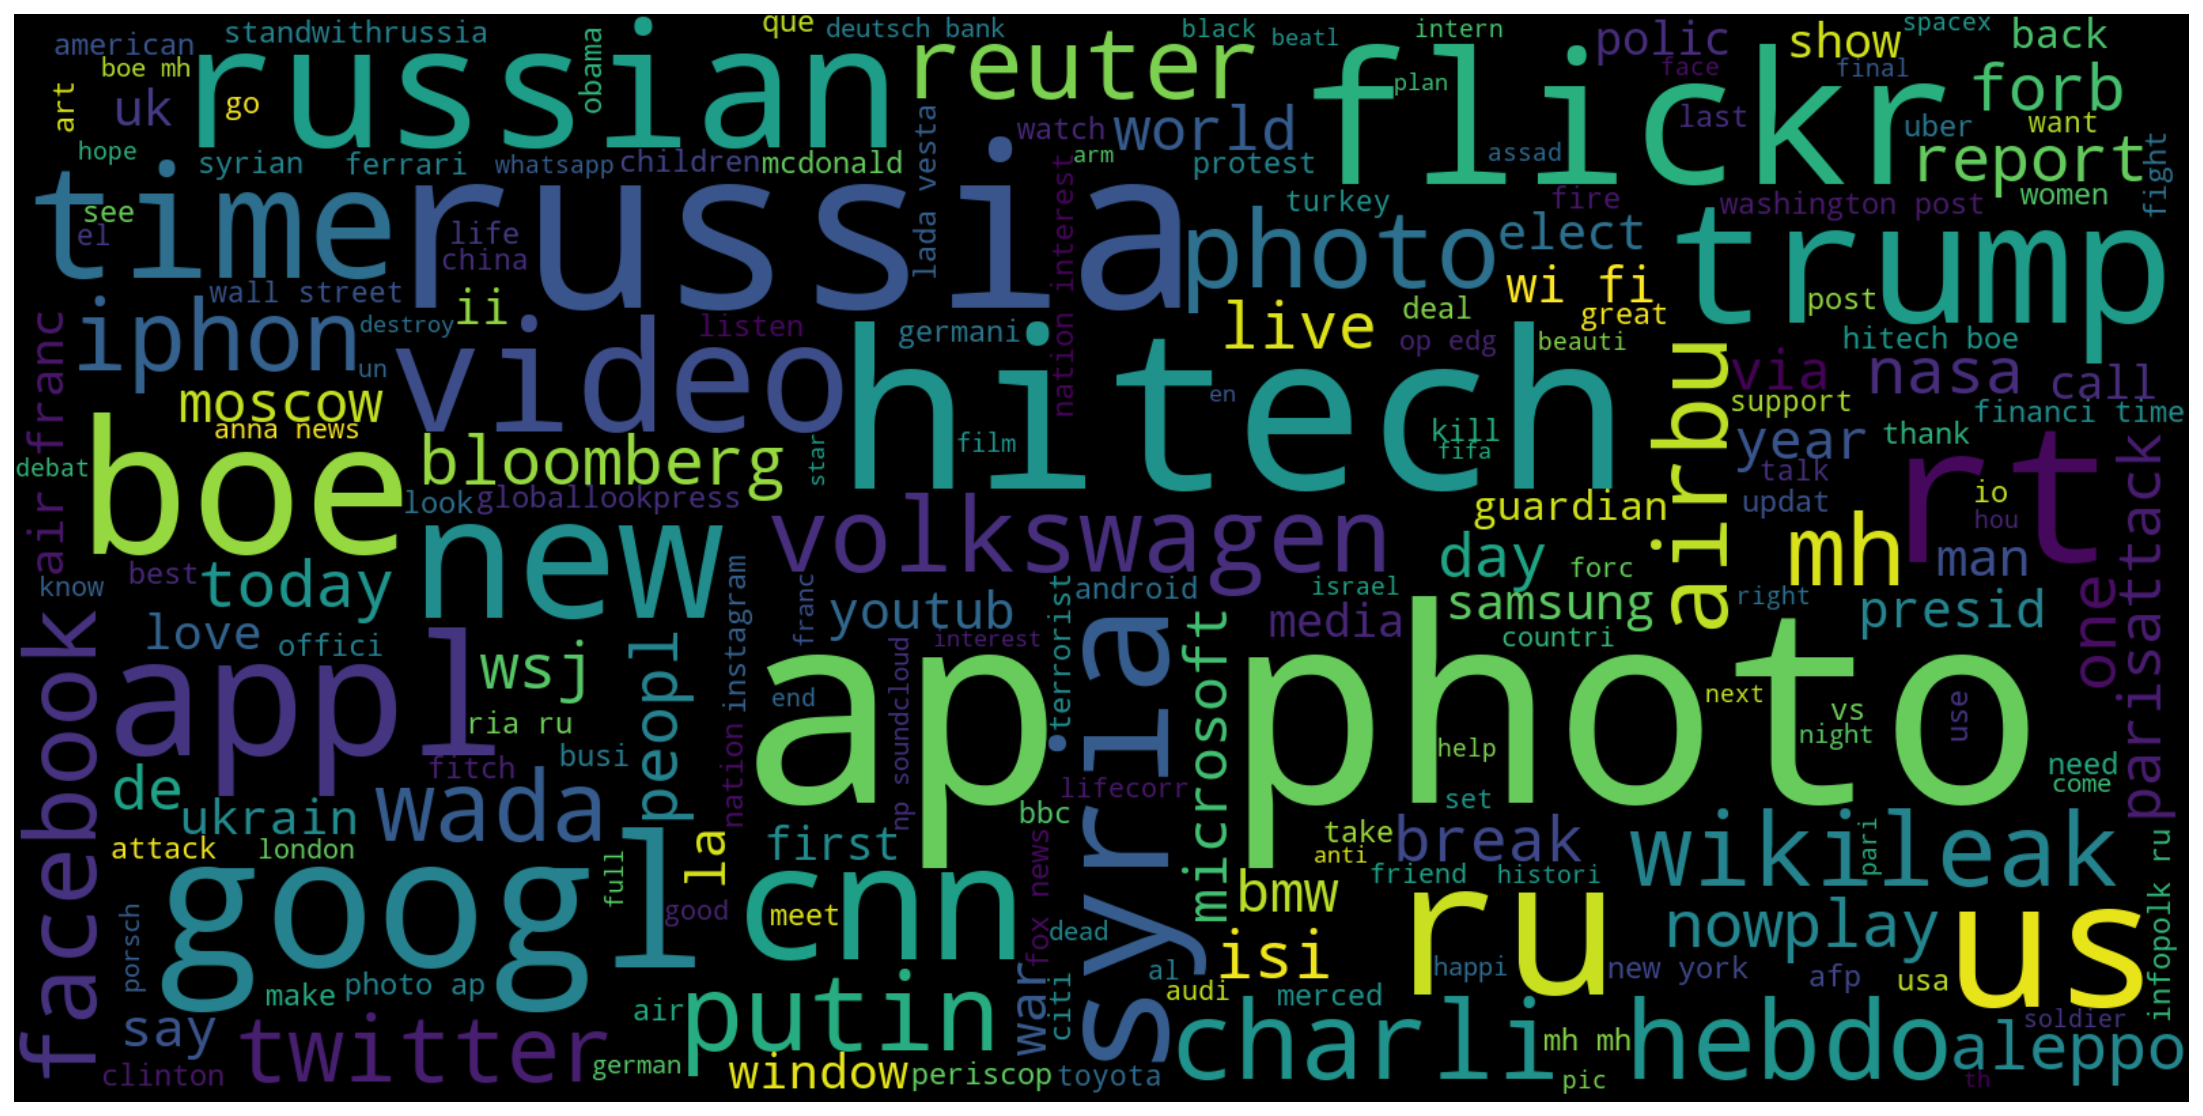

In [50]:
stem_words = " ".join(stemmed_words)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(stem_words)
plt.figure(figsize=(24,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Lemmatization 

In [49]:
#Lexicon Normalization
#performing stemming and Lemmatization
import nltk
nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "driving"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/computer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized Word: drive
Stemmed Word: drive


#### POS Tagging

In [ ]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(sent)
nltk.pos_tag(tokens)

In [ ]:
from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=stemmed_words, size=100, window=5, min_count=5, workers=4, sg=0)
model_ted.wv.most_similar('note')

#### Arabic

In [ ]:
right_tweets = my_df[my_df.account_type == "Arabic"]
right_string = []
for t in right_tweets.text:
    right_string.append(t)
right_string = pd.Series(right_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(right_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(right_string)
print(tokenized_word)

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

In [ ]:
fdist.most_common(20)

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

#### Hashtager

In [ ]:
right_tweets = my_df[my_df.account_type == "Hashtager"]
right_string = []
for t in right_tweets.text:
    right_string.append(t)
right_string = pd.Series(right_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(right_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
for t in left_tweets.text[:20000]:
    if 'trump' in t:
        print(t)

In [ ]:
for t in right_tweets.text[:20000]:
    if 'trump' in t:
        print(t)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

### Get number of words in the corpus

In [ ]:
len(cvec.get_feature_names())

In [ ]:
neg_doc_matrix = cvec.transform(my_df[my_df.account_type == "Right"].text)
pos_doc_matrix = cvec.transform(my_df[my_df.account_type == "Left"].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [ ]:
term_freq_df.columns = ['Right', 'Left']
term_freq_df['total'] = term_freq_df['Right'] + term_freq_df['Left']


In [ ]:
#term_freq_df.sort_values(by='total', ascending=True).iloc[:10]
sorted = term_freq_df.sort_values(by=['total'])
sorted.tail(50)

In [ ]:
sorted.to_csv('sorted.csv',encoding='utf-8')

#### Zipf's Law

In [ ]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [sorted.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, sorted.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

In [ ]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(10,8), frameon=False, dpi=30)
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
    
#plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
# fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
# fig.add_axes([0, 0, 1, 1])
# ax = plt.gca()

# corners = ((x1, y1), (x2, y2))
# ax.update_datalim(corners)

In [ ]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, sorted.sort_values(by='Right', ascending=False)['Right'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, sorted.sort_values(by='Right', ascending=False)['Right'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 total tokens')
plt.title('Top 50 tokens in tweets')

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="Left", y="Right",fit_reg=False, scatter_kws={'alpha':0.5},data=sorted)
plt.ylabel('Right Frequency')
plt.xlabel('Left Frequency')
plt.title('Right Frequency vs Left Frequency')

In [ ]:
sorted['Right'] = sorted['Right'] * 1./sorted['total']
sorted.sort_values(by='total', ascending=False).iloc[:20]

#### Remove Stop Words

In [ ]:
my_df.groupby('account_type').size()
#righty = my_df.groupby('account_type' = "Right")

In [ ]:
hashtag = my_df.loc[my_df['account_type'] == 'Hashtager']
print(hashtag)

In [ ]:
righty = my_df.loc[my_df['account_type'] == 'Right']
print(righty)

In [ ]:
lefty = my_df.loc[my_df['account_type'] == 'Left']
print(lefty)

In [ ]:
rusky = my_df.loc[my_df['account_type'] == 'Russian']
print(rusky)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#my_df = pd.read_csv('sorted.csv',index_col=0, encoding='utf_8')
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(righty.text)
cvec.fit(lefty.text)
cvec.fit(rusky.text)
cvec.fit(hashtag.text)

In [ ]:
left_matrix = cvec.transform(lefty.text)
right_matrix = cvec.transform(righty.text)
rusky_matrix = cvec.transform(rusky.text)
hash_matrix = cvec.transform(hashtag.text)

In [ ]:
%%time
neg_batches = np.linspace(0,196000,10).astype(int)
i=0
hash_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(hash_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    hash_tf.append(batch_result)
    print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

In [ ]:
%%time
neg_batches = np.linspace(0,196000,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(right_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

In [ ]:
%%time
pos_batches = np.linspace(0,192000,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(left_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

In [ ]:
%%time
pos_batches = np.linspace(0,192000,10).astype(int)
i=0
rus_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(rusky_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    rus_tf.append(batch_result)
    print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

In [ ]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
rus = np.sum(rus_tf,axis=0)
hashy = np.sum(hash_tf,axis=0)
totalRight = 112744
totalLeft = 35726
totalRus = 8694
totalHash = 27291
total = totalLeft + totalRight + totalRus + totalHash
term_freq_df2 = pd.DataFrame([neg,pos,rus,hashy],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['right', 'left','russian','hashtager']
term_freq_df2['total'] = (term_freq_df2['right'] + term_freq_df2['left'] + term_freq_df2['russian'] + term_freq_df2['hashtager']) / total * 100
term_freq_df2['right'] = (term_freq_df2['right'] / totalRight) * 100
term_freq_df2['left'] = (term_freq_df2['left'] / totalLeft) * 100
term_freq_df2['russian'] = (term_freq_df2['russian'] / totalRus) * 100
term_freq_df2['hashtager'] = (term_freq_df2['hashtager'] / totalHash) * 100
s2 = term_freq_df2.drop(['just', 'like','new','people','know','video','make','photo','photos',
                         'man','time','news','breaking','look','did','day','want','good','really','ll'])
df2_total_sorted = s2.sort_values(by='total', ascending=False).iloc[:10]
df2_left_sorted = s2.sort_values(by='left', ascending=False).iloc[:10]
df2_right_sorted = s2.sort_values(by='right', ascending=False).iloc[:10]
df2_rus_sorted = s2.sort_values(by='russian', ascending=False).iloc[:10]
df2_hash_sorted = s2.sort_values(by='hashtager', ascending=False).iloc[:10]

In [ ]:
df2_left_sorted.head(20)

In [ ]:
df2_right_sorted.head(20)

In [ ]:
df2_rus_sorted.head(20)

In [ ]:
df2_hash_sorted.head(20)

In [ ]:
df2_right_sorted.plot(kind='line', color=['red', 'blue','orange','green','yellow'],figsize=(20,10))

In [ ]:
df2_left_sorted.plot(kind='line', color=['red', 'blue','orange','green','yellow'],figsize=(20,10))

In [ ]:
df2_total_sorted.plot(kind='line', color=['red', 'blue','orange','green','yellow'],figsize=(20,10))

In [ ]:
df2_rus_sorted.plot(kind='line', color=['red', 'blue','orange','green','yellow'],figsize=(20,10))

In [ ]:
df2_hash_sorted.plot(kind='line', color=['red', 'blue','orange','green','yellow'],figsize=(20,10))

In [ ]:
s2.head()